In [259]:
import os
# !pip3 install tensorflow
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np


print(tf.__version__)

2.2.0


## Load VGG19 Model

In [260]:
'''
VGG19 parameters 
- include_top = Boolean, whether to include the 3-FC layers at the top of the network
- weights = path to wieghts file, 'imagenet'(pre-training on ImageNet), None
- input_tensor = optinal Keras tensor to use as image input for the model
- input_shape = It should have 3 input channels 
- pooling = Optional pooling mode for feature extraction when include_top is False.
- classes = optional number of classes to classify images into, 
        only to be specified if include_top is True, 
        and if no weights argument is specified.
- classifier_activation = str or callable, Ignored unless include_top=True. ex) softmax

VGG19 returns keras.Model instance
'''
base_model = VGG19(weights='imagenet')
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [261]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

In [262]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [263]:
class_names = os.listdir("../../feature/feature_fbank/")
class_names.sort()
   
forPrintList = [class_name.split('_')[1] for class_name in class_names]
print(forPrintList)

['kwakjuheon', 'kimjiho', 'songyejin', 'parksohui', 'moonyeonwoo', 'kangsubin', 'leekyeongeun', 'chochaeyeon', 'shindonghwan', 'kwakmirae', 'kimhyeryeong', 'chaeminjoon', 'kwakyiheon', 'leesumin', 'choihayoung', 'kangyeseo', 'kwakmihyang', 'eundano', 'limjinju', 'kimseongje', 'kwakbokyeong', 'ahnhyojin', 'heosehun', 'choijiwon', 'ahnjeongsuk', 'parkyeongseon', 'kwaksangpil', 'kodohyeon', 'limdonggeun', 'kanghyeyeon', 'jominseok', 'kwonyuna', 'kwoneunkyung', 'johaesu', 'leebyeongjin', 'hyeonsanghyeok', 'jennie', 'simseungmin', 'parksomi', 'yuminji', 'parksojin', 'kwonyeonwoo', 'ladakyeong', 'janghyomin', 'parkeunbi', 'parkdayeung', 'parkjongae', 'hansohee', 'janggyeoul', 'leewooju', 'nomyungok', 'heoyoonjung', 'heojaemin', 'kimsoyung', 'chuminha', 'kimhyeonsu', 'chaesonghwa', 'kwonyulim', 'kimminyoung', 'jueunhong', 'leejeongju', 'kwonnahui', 'kimdayeong', 'kwonsundo', 'kimhyeona', 'leehyojin', 'yuminji', 'jeonghojun', 'kanghyeyun', 'ohjiwon', 'kimdajeong', 'kimsubin', 'kimkihyeon', 'ki

In [264]:
x_list = []
y_list = []
fname_list =[]
for i in range(0,len(class_names)):
    files=os.listdir("../../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        fname_list.append("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

2017019880006_choisuyeon_2.npy 3
2017019880006_choisuyeon_0.npy 4
2017019880007
2017019880007_hwanghyebin_4.npy 0
2017019880007_hwanghyebin_2.npy 1
2017019880007_hwanghyebin_1.npy 2
2017019880007_hwanghyebin_3.npy 3
2017019880007_hwanghyebin_0.npy 4
2017019880008
2017019880008_jangsoojin_3.npy 0
2017019880008_jangsoojin_0.npy 1
2017019880008_jangsoojin_1.npy 2
2017019880008_jangsoojin_2.npy 3
2017019880008_jangsoojin_4.npy 4
2017019880009
2017019880009_kimhongjoo_3.npy 0
2017019880009_kimhongjoo_0.npy 1
2017019880009_kimhongjoo_1.npy 2
2017019880009_kimhongjoo_4.npy 3
2017019880009_kimhongjoo_2.npy 4
2017019880010
2017019880010_kimhyorin_0.npy 0
2017019880010_kimhyorin_1.npy 1
2017019880010_kimhyorin_4.npy 2
2017019880010_kimhyorin_3.npy 3
2017019880010_kimhyorin_2.npy 4
2017019880011
2017019880011_kimjihyun_1.npy 0
2017019880011_kimjihyun_3.npy 1
2017019880011_kimjihyun_2.npy 2
2017019880011_kimjihyun_0.npy 3
2017019880011_kimjihyun_4.npy 4
2017019880012
2017019880012_kimsongyi_4.npy 

### Convert Feature Numpy Array to PNG image

In [265]:
import imageio
import os
def npy_2_png (cname,fname):
    if not os.path.exists("../../feature/feature_fbank_png/"):
        os.makedirs("../../feature/feature_fbank_png/")
    if not os.path.exists("../../feature/feature_fbank_png/"+cname) :
        os.makedirs("../../feature/feature_fbank_png/"+cname)
    
    array = np.load("../../feature/feature_fbank/"+cname+"/"+fname)
    
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i)):
        os.remove("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i),array)
    return "../../feature/feature_fbank_png/"+cname+"/{}.png".format(i)

In [266]:
X_TF = []
y_TF = []
from tensorflow.keras.preprocessing import image

for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    fbank = image.load_img(npy_2_png(fname.split('/')[4],fname.split('/')[5]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF.append(list(flatten[0]))
    y_TF.append(class_names.index(fname.split('/')[4]))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


2 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy
3 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


5 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_3.npy
6 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_1.npy
7 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


8 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_4.npy
9 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_0.npy
10 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


11 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_3.npy
12 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_4.npy
13 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


14 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_0.npy
15 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_2.npy
16 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


17 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_3.npy
18 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_0.npy
19 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


20 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_3.npy
21 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_2.npy
22 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


23 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_4.npy
24 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_1.npy
25 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


26 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_1.npy
27 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_4.npy
28 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


29 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_0.npy
30 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_2.npy
31 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


32 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_0.npy
33 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_3.npy
34 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


35 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_4.npy
36 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_3.npy
37 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


38 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_1.npy
39 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_0.npy
40 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


41 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy
42 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy
43 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


44 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy
45 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy
46 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


47 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy
48 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy
49 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


50 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_1.npy
51 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_3.npy
52 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


53 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_4.npy
54 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_2.npy
55 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


56 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_4.npy
57 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_1.npy
58 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


59 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_3.npy
60 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_0.npy
61 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


62 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_4.npy
63 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_2.npy
64 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


65 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_0.npy
66 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_4.npy
67 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


68 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_1.npy
69 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_3.npy
70 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


71 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_1.npy
72 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_4.npy
73 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


74 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_0.npy
75 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy
76 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


77 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_2.npy
78 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_4.npy
79 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


80 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_3.npy
81 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_2.npy
82 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


83 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_4.npy
84 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_0.npy
85 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


86 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_4.npy
87 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_1.npy
88 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


89 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_2.npy
90 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_1.npy
91 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


92 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_4.npy
93 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_2.npy
94 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


95 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_3.npy
96 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_1.npy
97 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


98 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_2.npy
99 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_0.npy
100 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


101 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_2.npy
102 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_0.npy
103 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


104 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_4.npy
105 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_0.npy
106 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


107 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_2.npy
108 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_3.npy
109 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


110 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_3.npy
111 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_0.npy
112 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


113 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_2.npy
114 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_1.npy
115 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


116 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_0.npy
117 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_3.npy
118 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


119 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_4.npy
120 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_2.npy
121 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


122 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_1.npy
123 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_0.npy
124 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


125 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_1.npy
126 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_0.npy
127 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


128 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_4.npy
129 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_3.npy
130 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


131 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_3.npy
132 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_2.npy
133 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


134 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_4.npy
135 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_2.npy
136 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


137 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_1.npy
138 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_3.npy
139 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


140 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_5.npy
141 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_4.npy
142 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


143 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_3.npy
144 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_1.npy
145 ../../feature/feature_fbank/2017019740029_limdonggeun/2017019740029_limdonggeun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


146 ../../feature/feature_fbank/2017019740030_kanghyeyeon/2017019740030_kanghyeyeon_0.npy
147 ../../feature/feature_fbank/2017019740030_kanghyeyeon/2017019740030_kanghyeyeon_1.npy
148 ../../feature/feature_fbank/2017019740030_kanghyeyeon/2017019740030_kanghyeyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


149 ../../feature/feature_fbank/2017019740030_kanghyeyeon/2017019740030_kanghyeyeon_3.npy
150 ../../feature/feature_fbank/2017019740030_kanghyeyeon/2017019740030_kanghyeyeon_2.npy
151 ../../feature/feature_fbank/2017019740031_jominseok/2017019740031_jominseok_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


152 ../../feature/feature_fbank/2017019740031_jominseok/2017019740031_jominseok_1.npy
153 ../../feature/feature_fbank/2017019740031_jominseok/2017019740031_jominseok_2.npy
154 ../../feature/feature_fbank/2017019740031_jominseok/2017019740031_jominseok_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


155 ../../feature/feature_fbank/2017019740031_jominseok/2017019740031_jominseok_3.npy
156 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy
157 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


158 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
159 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy
160 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


161 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_3.npy
162 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_2.npy
163 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


164 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_1.npy
165 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_4.npy
166 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


167 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_0.npy
168 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_1.npy
169 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


170 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_3.npy
171 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy
172 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


173 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy
174 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy
175 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


176 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_1.npy
177 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_2.npy
178 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


179 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_0.npy
180 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_3.npy
181 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


182 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_0.npy
183 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_1.npy
184 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


185 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_3.npy
186 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_3.npy
187 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


188 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_1.npy
189 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_4.npy
190 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


191 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_2.npy
192 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_1.npy
193 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


194 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_0.npy
195 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_4.npy
196 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


197 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_4.npy
198 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_0.npy
199 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


200 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_2.npy
201 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_1.npy
202 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


203 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_0.npy
204 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_3.npy
205 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


206 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy
207 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_2.npy
208 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


209 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_4.npy
210 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy
211 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


212 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy
213 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy
214 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


215 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy
216 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_2.npy
217 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


218 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_0.npy
219 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_1.npy
220 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


221 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_3.npy
222 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_2.npy
223 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


224 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy
225 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy
226 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


227 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy
228 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy
229 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


230 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy
231 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_4.npy
232 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


233 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_3.npy
234 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_0.npy
235 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


236 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_3.npy
237 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_1.npy
238 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


239 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_2.npy
240 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_4.npy
241 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


242 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy
243 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy
244 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


245 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_0.npy
246 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_3.npy
247 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


248 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_1.npy
249 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_2.npy
250 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


251 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_4.npy
252 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_1.npy
253 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


254 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_2.npy
255 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_3.npy
256 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


257 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy
258 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy
259 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


260 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
261 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_4.npy
262 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


263 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
264 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_0.npy
265 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


266 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
267 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_0.npy
268 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


269 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
270 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy
271 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


272 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_4.npy
273 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_2.npy
274 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


275 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_1.npy
276 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy
277 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


278 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
279 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy
280 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


281 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
282 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy
283 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


284 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
285 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy
286 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


287 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
288 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy
289 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


290 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
291 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy
292 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


293 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
294 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy
295 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


296 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
297 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_0.npy
298 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


299 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
300 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_2.npy
301 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


302 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
303 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_2.npy
304 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


305 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
306 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_1.npy
307 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


308 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_3.npy
309 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_2.npy
310 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


311 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_2.npy
312 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_0.npy
313 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


314 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_4.npy
315 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_3.npy
316 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


317 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_1.npy
318 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_2.npy
319 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


320 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_0.npy
321 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_2.npy
322 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


323 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_1.npy
324 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_0.npy
325 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


326 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_4.npy
327 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_1.npy
328 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


329 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_2.npy
330 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_0.npy
331 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


332 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_1.npy
333 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_3.npy
334 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


335 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_0.npy
336 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_0.npy
337 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


338 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_1.npy
339 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_2.npy
340 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


341 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_1.npy
342 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_3.npy
343 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


344 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_0.npy
345 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_4.npy
346 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


347 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_4.npy
348 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_0.npy
349 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


350 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_2.npy
351 ../../feature/feature_fbank/2017019770040_kimdajeong/2017019770040_kimdajeong_2.npy
352 ../../feature/feature_fbank/2017019770040_kimdajeong/2017019770040_kimdajeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


353 ../../feature/feature_fbank/2017019770040_kimdajeong/2017019770040_kimdajeong_1.npy
354 ../../feature/feature_fbank/2017019770040_kimdajeong/2017019770040_kimdajeong_4.npy
355 ../../feature/feature_fbank/2017019770040_kimdajeong/2017019770040_kimdajeong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


356 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
357 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
358 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


359 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
360 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
361 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


362 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy
363 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy
364 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


365 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy
366 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_1.npy
367 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


368 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_2.npy
369 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_0.npy
370 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


371 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy
372 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy
373 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


374 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy
375 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy
376 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


377 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy
378 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy
379 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


380 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy
381 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_3.npy
382 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


383 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_1.npy
384 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_2.npy
385 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


386 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_4.npy
387 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_2.npy
388 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


389 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_3.npy
390 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_0.npy
391 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


392 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_0.npy
393 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_1.npy
394 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


395 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_4.npy
396 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_3.npy
397 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


398 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_1.npy
399 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_4.npy
400 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


401 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_0.npy
402 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_1.npy
403 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


404 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_3.npy
405 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_2.npy
406 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


407 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_3.npy
408 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_2.npy
409 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


410 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_4.npy
411 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_4.npy
412 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


413 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_3.npy
414 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_2.npy
415 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


416 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_0.npy
417 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_1.npy
418 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


419 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_2.npy
420 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_4.npy
421 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


422 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_2.npy
423 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_4.npy
424 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


425 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_3.npy
426 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_3.npy
427 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


428 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_4.npy
429 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_1.npy
430 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


431 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_0.npy
432 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_3.npy
433 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


434 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_1.npy
435 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_2.npy
436 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


437 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_1.npy
438 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_3.npy
439 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


440 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_2.npy
441 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_4.npy
442 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


443 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_3.npy
444 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_1.npy
445 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


446 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_2.npy
447 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_3.npy
448 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


449 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_1.npy
450 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_0.npy
451 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


452 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_1.npy
453 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_0.npy
454 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


455 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_3.npy
456 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_3.npy
457 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


458 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_1.npy
459 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_2.npy
460 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


461 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_3.npy
462 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_0.npy
463 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


464 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_1.npy
465 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_2.npy
466 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


467 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_4.npy
468 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_2.npy
469 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


470 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_3.npy
471 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_2.npy
472 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


473 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_4.npy
474 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_1.npy
475 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


476 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_3.npy
477 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_2.npy
478 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


479 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_1.npy
480 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_4.npy
481 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


482 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_0.npy
483 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_2.npy
484 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


485 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_3.npy
486 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_3.npy
487 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


488 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_0.npy
489 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_1.npy
490 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


491 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_3.npy
492 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_0.npy
493 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


494 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_1.npy
495 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_4.npy
496 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


497 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_1.npy
498 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_3.npy
499 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


500 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_2.npy
501 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_2.npy
502 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


503 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_3.npy
504 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_4.npy
505 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


506 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_4.npy
507 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_2.npy
508 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


509 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_3.npy
510 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_0.npy
511 ../../feature/feature_fbank/2017019880032_seoyeonjoo/2017019880032_seoyeonjoo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


512 ../../feature/feature_fbank/2017019880032_seoyeonjoo/2017019880032_seoyeonjoo_0.npy
513 ../../feature/feature_fbank/2017019880032_seoyeonjoo/2017019880032_seoyeonjoo_3.npy
514 ../../feature/feature_fbank/2017019880032_seoyeonjoo/2017019880032_seoyeonjoo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


515 ../../feature/feature_fbank/2017019880032_seoyeonjoo/2017019880032_seoyeonjoo_2.npy
516 ../../feature/feature_fbank/2017019880033_kimnoeun/2017019880033_kimnoeun_3.npy
517 ../../feature/feature_fbank/2017019880033_kimnoeun/2017019880033_kimnoeun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


518 ../../feature/feature_fbank/2017019880033_kimnoeun/2017019880033_kimnoeun_2.npy
519 ../../feature/feature_fbank/2017019880033_kimnoeun/2017019880033_kimnoeun_1.npy
520 ../../feature/feature_fbank/2017019880033_kimnoeun/2017019880033_kimnoeun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


521 ../../feature/feature_fbank/2017019880034_leesujung/2017019880034_leesujung_1.npy
522 ../../feature/feature_fbank/2017019880034_leesujung/2017019880034_leesujung_2.npy
523 ../../feature/feature_fbank/2017019880034_leesujung/2017019880034_leesujung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


524 ../../feature/feature_fbank/2017019880034_leesujung/2017019880034_leesujung_4.npy
525 ../../feature/feature_fbank/2017019880034_leesujung/2017019880034_leesujung_3.npy
526 ../../feature/feature_fbank/2017019880035_songhyunjin/2017019880035_songhyunjin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


527 ../../feature/feature_fbank/2017019880035_songhyunjin/2017019880035_songhyunjin_4.npy
528 ../../feature/feature_fbank/2017019880035_songhyunjin/2017019880035_songhyunjin_3.npy
529 ../../feature/feature_fbank/2017019880035_songhyunjin/2017019880035_songhyunjin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


530 ../../feature/feature_fbank/2017019880035_songhyunjin/2017019880035_songhyunjin_1.npy
531 ../../feature/feature_fbank/2017019880036_kimjihye/2017019880036_kimjihye_1.npy
532 ../../feature/feature_fbank/2017019880036_kimjihye/2017019880036_kimjihye_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


533 ../../feature/feature_fbank/2017019880036_kimjihye/2017019880036_kimjihye_4.npy
534 ../../feature/feature_fbank/2017019880036_kimjihye/2017019880036_kimjihye_3.npy
535 ../../feature/feature_fbank/2017019880036_kimjihye/2017019880036_kimjihye_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


536 ../../feature/feature_fbank/2017019880037_jusunghyun/2017019880037_jusunghyun_2.npy
537 ../../feature/feature_fbank/2017019880037_jusunghyun/2017019880037_jusunghyun_0.npy
538 ../../feature/feature_fbank/2017019880037_jusunghyun/2017019880037_jusunghyun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


539 ../../feature/feature_fbank/2017019880037_jusunghyun/2017019880037_jusunghyun_4.npy
540 ../../feature/feature_fbank/2017019880037_jusunghyun/2017019880037_jusunghyun_3.npy
541 ../../feature/feature_fbank/2017019880038_baejaehong/2017019880038_baejaehong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


542 ../../feature/feature_fbank/2017019880038_baejaehong/2017019880038_baejaehong_4.npy
543 ../../feature/feature_fbank/2017019880038_baejaehong/2017019880038_baejaehong_3.npy
544 ../../feature/feature_fbank/2017019880038_baejaehong/2017019880038_baejaehong_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


545 ../../feature/feature_fbank/2017019880038_baejaehong/2017019880038_baejaehong_0.npy
546 ../../feature/feature_fbank/2017019880039_seojuyeon/2017019880039_seojuyeon_2.npy
547 ../../feature/feature_fbank/2017019880039_seojuyeon/2017019880039_seojuyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


548 ../../feature/feature_fbank/2017019880039_seojuyeon/2017019880039_seojuyeon_4.npy
549 ../../feature/feature_fbank/2017019880039_seojuyeon/2017019880039_seojuyeon_1.npy
550 ../../feature/feature_fbank/2017019880039_seojuyeon/2017019880039_seojuyeon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


551 ../../feature/feature_fbank/2017019880040_shinheewook/2017019880040_shinheewook_4.npy
552 ../../feature/feature_fbank/2017019880040_shinheewook/2017019880040_shinheewook_0.npy
553 ../../feature/feature_fbank/2017019880040_shinheewook/2017019880040_shinheewook_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


554 ../../feature/feature_fbank/2017019880040_shinheewook/2017019880040_shinheewook_3.npy
555 ../../feature/feature_fbank/2017019880040_shinheewook/2017019880040_shinheewook_1.npy
556 ../../feature/feature_fbank/2017019880041_kimdaeun/2017019880041_kimdaeun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


557 ../../feature/feature_fbank/2017019880041_kimdaeun/2017019880041_kimdaeun_2.npy
558 ../../feature/feature_fbank/2017019880041_kimdaeun/2017019880041_kimdaeun_0.npy
559 ../../feature/feature_fbank/2017019880041_kimdaeun/2017019880041_kimdaeun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


560 ../../feature/feature_fbank/2017019880041_kimdaeun/2017019880041_kimdaeun_3.npy
561 ../../feature/feature_fbank/2017019880042_namyeji/2017019880042_namyeji_4.npy
562 ../../feature/feature_fbank/2017019880042_namyeji/2017019880042_namyeji_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


563 ../../feature/feature_fbank/2017019880042_namyeji/2017019880042_namyeji_0.npy
564 ../../feature/feature_fbank/2017019880042_namyeji/2017019880042_namyeji_1.npy
565 ../../feature/feature_fbank/2017019880042_namyeji/2017019880042_namyeji_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


566 ../../feature/feature_fbank/2017019880043_leegawon/2017019880043_leegawon_2.npy
567 ../../feature/feature_fbank/2017019880043_leegawon/2017019880043_leegawon_1.npy
568 ../../feature/feature_fbank/2017019880043_leegawon/2017019880043_leegawon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


569 ../../feature/feature_fbank/2017019880043_leegawon/2017019880043_leegawon_4.npy
570 ../../feature/feature_fbank/2017019880043_leegawon/2017019880043_leegawon_0.npy
571 ../../feature/feature_fbank/2017019880044_yoonsuhyun/2017019880044_yoonsuhyun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


572 ../../feature/feature_fbank/2017019880044_yoonsuhyun/2017019880044_yoonsuhyun_3.npy
573 ../../feature/feature_fbank/2017019880044_yoonsuhyun/2017019880044_yoonsuhyun_4.npy
574 ../../feature/feature_fbank/2017019880044_yoonsuhyun/2017019880044_yoonsuhyun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


575 ../../feature/feature_fbank/2017019880044_yoonsuhyun/2017019880044_yoonsuhyun_0.npy


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_TF_train = np.array(X_TF)
y_TF_train = np.array(y_TF)

X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(X_TF_train, y_TF_train, test_size=0.30, random_state=42, stratify=y_TF_train)

from tensorflow.keras.utils import to_categorical
y_TF_train_encoded = tf.keras.utils.to_categorical(y_TF_train)
y_TF_test_encoded = tf.keras.utils.to_categorical(y_TF_test)

X_TF_train_reshape = X_TF_train.reshape(-1, X_TF_train.shape[1], 1)
X_TF_test_reshape   = X_TF_test.reshape(-1, X_TF_test.shape[1], 1)

**Check Data Distribution**  


In [268]:
removed_dup = set(y_TF_train)
print("Class Num of Train Data :",len(removed_dup),"\n")

TempList = list(zip(X_TF_train,y_TF_train))
TempArray = np.array(TempList)

for classNum in removed_dup :
    print(class_names[classNum].split("_")[1],"\'s length :", len(*np.where(TempArray[:,1]==classNum)))


Class Num of Train Data : 115 

kwakjuheon 's length : 4
kimjiho 's length : 3
songyejin 's length : 3
parksohui 's length : 3
moonyeonwoo 's length : 4
kangsubin 's length : 4
leekyeongeun 's length : 3
chochaeyeon 's length : 4
shindonghwan 's length : 3
kwakmirae 's length : 4
kimhyeryeong 's length : 4
chaeminjoon 's length : 4
kwakyiheon 's length : 4
leesumin 's length : 3
choihayoung 's length : 3
kangyeseo 's length : 4
kwakmihyang 's length : 4
eundano 's length : 3
limjinju 's length : 4
kimseongje 's length : 4
kwakbokyeong 's length : 3
ahnhyojin 's length : 3
heosehun 's length : 4
choijiwon 's length : 3
ahnjeongsuk 's length : 3
parkyeongseon 's length : 3
kwaksangpil 's length : 4
kodohyeon 's length : 4
limdonggeun 's length : 4
kanghyeyeon 's length : 4
jominseok 's length : 3
kwonyuna 's length : 4
kwoneunkyung 's length : 4
johaesu 's length : 3
leebyeongjin 's length : 4
hyeonsanghyeok 's length : 4
jennie 's length : 4
simseungmin 's length : 4
parksomi 's length 

In [269]:
print(X_TF_train_reshape.shape)
print(X_TF_test_reshape.shape)

print(y_TF_train_encoded.shape)
print(y_TF_test_encoded.shape)
print()
print(y_TF_train.shape)
print(y_TF_test.shape)

(403, 25088, 1)
(173, 25088, 1)
(403, 115)
(173, 115)

(403,)
(173,)


(25088,)


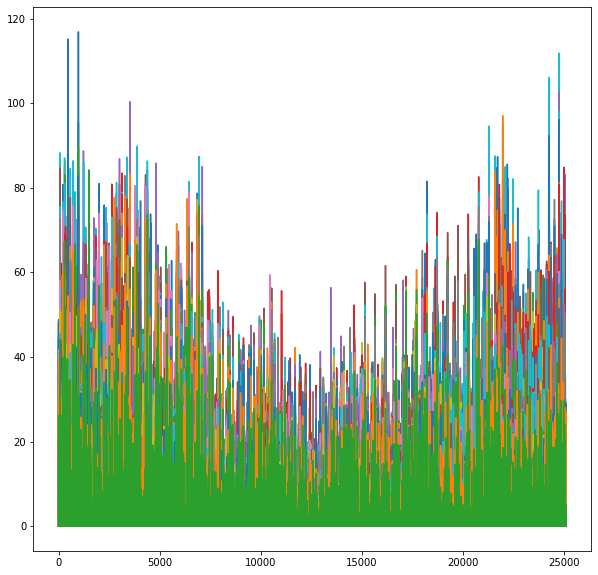

In [270]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
print(X_TF_train[0].shape)
for num in range(X_TF_train.shape[0]):
    plt.plot(X_TF_train[num])
plt.show()

**Flatten Output Scatter Plot**

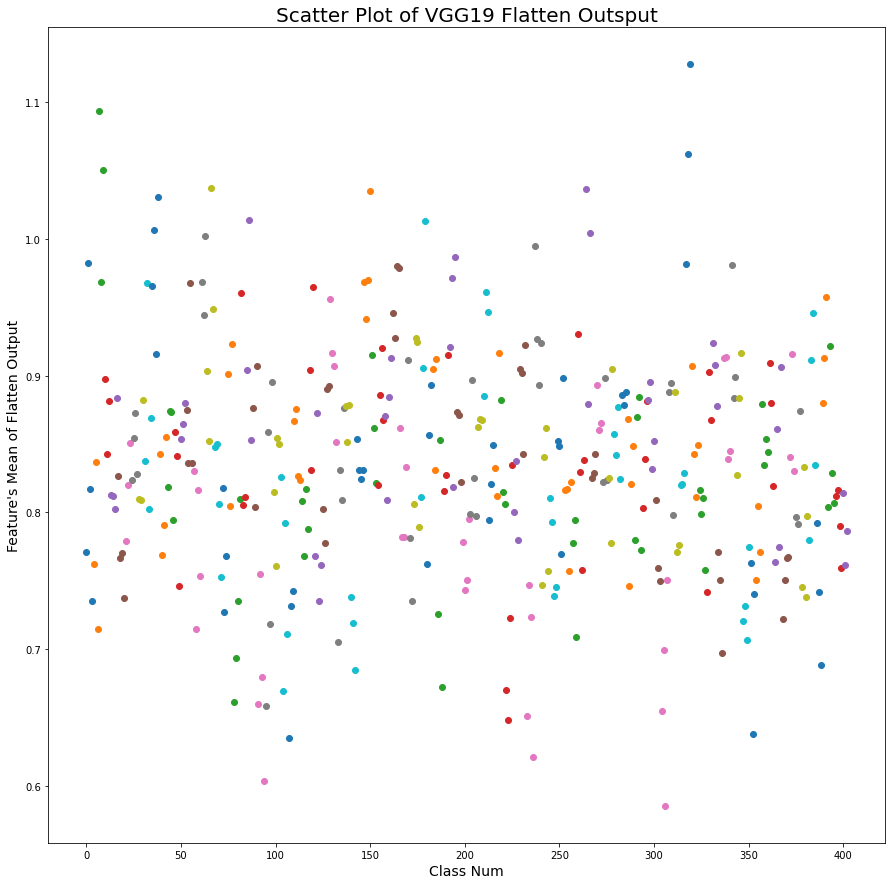

In [271]:
removed_dup = set(y_TF_train)

TempList = list(zip(X_TF_train,y_TF_train))
TempArray = np.array(TempList)

plt.figure(figsize=(15,15))

checkFeat = 0
for idx, classNum in enumerate(removed_dup) :
    
    group = X_TF_train[np.array(*np.where(TempArray[:,1]==classNum))]
    
    X_Point = [np.mean(indivi) for indivi in group]
    X_Point = np.array(X_Point)
    
    plt.scatter(range(checkFeat,checkFeat+group.shape[0]), X_Point)
    checkFeat = checkFeat+group.shape[0]



plt.title('Scatter Plot of VGG19 Flatten Outsput', fontsize=20)
plt.xlabel('Class Num', fontsize=14)
plt.ylabel('Feature\'s Mean of Flatten Output', fontsize=14)

plt.show()

## Classifier Learninig 

### Linear SVM

In [272]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
trained_clf =clf.fit(X_TF_train, y_TF_train)

predicted = clf.predict(X_TF_test)

# get the accuracy
print (accuracy_score(y_TF_test, predicted),"\n")

print("Accuracy of Training set: {:.3f}".format(clf.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(clf.score(X_TF_test, y_TF_test)))

0.9595375722543352 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.960


**Performance Graph**

In [273]:
from sklearn.metrics import classification_report
target_names = [class_name.split('_')[1] for class_name in class_names]
print(classification_report(y_TF_test, predicted, target_names=target_names))

                precision    recall  f1-score   support

    kwakjuheon       1.00      1.00      1.00         1
       kimjiho       0.67      1.00      0.80         2
     songyejin       1.00      1.00      1.00         2
     parksohui       1.00      1.00      1.00         2
   moonyeonwoo       1.00      1.00      1.00         1
     kangsubin       1.00      1.00      1.00         1
  leekyeongeun       1.00      1.00      1.00         2
   chochaeyeon       1.00      1.00      1.00         1
  shindonghwan       1.00      1.00      1.00         2
     kwakmirae       1.00      1.00      1.00         1
  kimhyeryeong       1.00      1.00      1.00         1
   chaeminjoon       1.00      1.00      1.00         1
    kwakyiheon       0.50      1.00      0.67         1
      leesumin       1.00      1.00      1.00         2
   choihayoung       1.00      1.00      1.00         2
     kangyeseo       1.00      1.00      1.00         1
   kwakmihyang       1.00      1.00      1.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [274]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt

false_pos = dict()
true_pos = dict()
roc_auc = dict()

y_TF_score = trained_clf.decision_function(X_TF_test)

for i in range(0, len(class_names)):
    false_pos[i], true_pos[i], _ = roc_curve(y_TF_test_encoded[:, i], y_TF_score[:, i])
    roc_auc[i] = auc(false_pos[i], true_pos[i])


In [275]:
false_pos["micro"], true_pos["micro"], _ = roc_curve(y_TF_test_encoded.ravel(), y_TF_score.ravel())
roc_auc["micro"] = auc(false_pos["micro"], true_pos["micro"])

In [276]:
# axis
all_false_pos = np.unique(np.concatenate([false_pos[i] for i in range(0, len(class_names))]))
mean_true_pos = np.zeros_like(all_false_pos)

# x=false_pos, y=true_pos를 all_false_pos에 따라 보간법 적용(?)
# 길이를 len(all_false_pos) 로 맞춘 것이라 생각
for i in range(0, len(class_names)):
    mean_true_pos += interp(all_false_pos, false_pos[i], true_pos[i])
    
# mean_true_pos는 true positive rate의 평균이다
mean_true_pos /= len(class_names)

<ipython-input-276-53d1cf7813f6>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_true_pos += interp(all_false_pos, false_pos[i], true_pos[i])


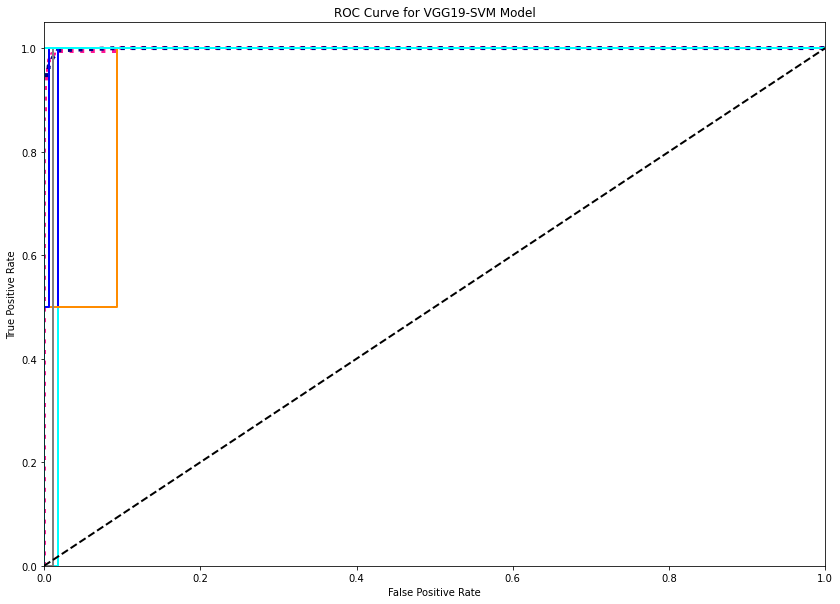

In [287]:
false_pos["macro"] = all_false_pos
true_pos["macro"] = mean_true_pos
roc_auc["macro"] = auc(false_pos["macro"], true_pos["macro"])

# Plot all ROC curves
plt.figure(figsize = (14,10))
plt.plot(false_pos["micro"], true_pos["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

## 전체적인 평균
plt.plot(false_pos["macro"], true_pos["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange',  'gray', 'blue','black','yellow'])
lw =2

np.seterr(divide='ignore', invalid ='ignore')

for i, color in zip(range(len(class_names)), colors):
    plt.plot(false_pos[i], true_pos[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
#     graph_line = true_pos[i] / false_pos[i]
#     graph_line = [val for val in graph_line if not np.isnan(val)]
#     graph_line = [val for val in graph_line if not np.isinf(val)]
#     
#     if color =='blue' and  np.min(graph_line) >= 0.5:
#         print("{:d} : {:s}\'s ROC Curve is Unstable".format(i,class_names[i].split("_")[1]))
#     if np.min(graph_line) < 0.5 :
#         plt.plot(false_pos[i], true_pos[i], color=color, lw=lw)
#     else :
#         plt.plot(false_pos[i], true_pos[i], color='red', lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG19-SVM Model')
# plt.legend()
plt.show()

**Predict from new Voice**

In [289]:
def val_npy_2_png (cname,fname):
    if not os.path.exists("../../feature/feature_fbank_validation_png/"):
        os.makedirs("../../feature/feature_fbank_validation_png/")
    if not os.path.exists("../../feature/feature_fbank_validation_png/"+cname) :
        os.makedirs("../../feature/feature_fbank_validation_png/"+cname)
    
    array = np.load("../../feature/feature_fbank_validation/"+cname+"/"+fname)
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)):
        os.remove("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i),array)
    return "../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)

In [290]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../../feature/feature_fbank_validation/")
val_class_names.sort()
val_fname=[]

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append("../../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])

X_TF_pred = []
y_TF_pred = []

for i,fname in zip(range(0,len(val_fname)), val_fname):
    print(i,fname)
    
    fbank = image.load_img(val_npy_2_png(fname.split('/')[4],fname.split('/')[5]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF_pred.append(list(flatten[0]))
    y_TF_pred.append(val_class_names.index(fname.split('/')[4]))

    
X_TF_pred = np.array(X_TF_pred)
y_TF_pred = np.array(y_TF_pred)
# y_TF_pred_encode = tf.keras.utils.to_categorical(y_TF_pred)

predicted = clf.predict(X_TF_pred)
real =[]
for i,pred in zip(range(0, len(predicted)), predicted) :
    print("Predict :",class_names[pred], ", Real :", val_class_names[y_TF_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_pred[i]]))
# 
# get the accuracy
print (accuracy_score(real, predicted))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../../feature/feature_fbank_validation/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../../feature/feature_fbank_validation/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy
7 ../../feature/feature_fbank_validation/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
8 ../../feature/feature_fbank_validation/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../../feature/feature_fbank_validation/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy
10 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
11 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


12 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
13 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
14 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019880001_kimsubin , Real : 20170198

### Non-Linear SVM

In [291]:
from sklearn import svm

nonlinear_clf = svm.NuSVC(gamma='auto')
nonlinear_clf.fit(X_TF_train, y_TF_train)

predicted_svc = nonlinear_clf.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_svc),"\n")

print("Accuracy of Training set: {:.3f}".format(nonlinear_clf.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(nonlinear_clf.score(X_TF_test, y_TF_test)))

0.3179190751445087 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.318


### SVM Using PolyNomial Kernel  

 kernel을 사용하면 베이시스 함수를 하나씩 정의하는 수고를 덜 수 있을뿐더러 변환과 내적에 들어가는 계산량이 줄어든다.

In [292]:
from sklearn.svm import SVC

nonlinear_poly = SVC(kernel='poly', random_state=0, gamma='auto', C=1)
nonlinear_poly.fit(X_TF_train, y_TF_train)

predicted_svc_poly = nonlinear_poly.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_svc_poly),"\n")

print("Accuracy of Training set: {:.3f}".format(nonlinear_poly.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(nonlinear_poly.score(X_TF_test, y_TF_test)))

0.8670520231213873 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.867


### SVM Using RBF Kernel  

In [293]:
from sklearn.svm import SVC

nonlinear_rbf = SVC(kernel='rbf', random_state=0, gamma='auto', C=1)
nonlinear_rbf.fit(X_TF_train, y_TF_train)

predicted_svc_rbf = nonlinear_rbf.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_svc_rbf),"\n")

print("Accuracy of Training set: {:.3f}".format(nonlinear_rbf.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(nonlinear_rbf.score(X_TF_test, y_TF_test)))

0.3179190751445087 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.318


### Random Forest Classifier

In [294]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators= 1000, random_state=0)
forest.fit(X_TF_train, y_TF_train)

predicted_forest = forest.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_forest),"\n")

print("Accuracy of Training set: {:.3f}".format(forest.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(forest.score(X_TF_test, y_TF_test)))

0.8786127167630058 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.879


### Decision Tree

In [295]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_TF_train, y_TF_train)

predicted_tree = tree.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_tree),"\n")

print("Accuracy of Training set: {:.3f}".format(tree.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(tree.score(X_TF_test, y_TF_test)))

0.18497109826589594 

Accuracy of Training set: 1.000
Accuracy of Test set: 0.185


### Gradient Boosting

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)

In [ ]:
gbrt.fit(X_TF_train, y_TF_train)
predicted_gbrt = gbrt.predict(X_TF_test)
print (accuracy_score(y_TF_test, predicted_gbrt))

print("Accuracy of Training set: {:.3f}".format(gbrt.score(X_TF_train, y_TF_train)))
print("Accuracy of Test set: {:.3f}".format(gbrt.score(X_TF_test, y_TF_test)))